In [1]:
import pandas as pd
import os
import math
import nltk
import pickle
import json
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
#Load docs, queries and the inverted index
with open("./Output/preprocessed_docs","rb") as file:
    docs = pickle.load(file)

with open("./Output/preprocessed_queries","rb") as file:
    queries = pickle.load(file)

with open("./Output/inverted_index","r") as file:
    inverted_index = json.load(file)


In [3]:
def query_weights1(tf,idf,term):
    return (0.5 + (0.5*tf[term])/tf[max(tf)]) * idf

In [4]:
def document_weights1(tf,idf,term):
    return tf*idf

In [5]:
def vector_space(query,docs, query_weight_func, doc_weight_func):

        tf={}
        
        for term in set(query):#Get query term frequency
                tf[term] = query.count(term)

        #Calculate query and doc weights
        query_weights = []
        document_weights = {}

        for doc in docs:
                document_weights[doc[0]] = []
        
        for term in set(query):

               # if  len(inverted_index[term]):
                if term in inverted_index and len(inverted_index[term]):
                        
                        idf = math.log(len(docs)/len(inverted_index[term]))

                        query_weights.append(query_weight_func(tf,idf,term))

                        for doc in docs:

                                try:
                                        tf_doc = inverted_index[term][doc[0]]
                                except:
                                        tf_doc = 0

                                w = doc_weight_func(tf_doc,idf,term)
                                document_weights[doc[0]].append(w)   

       
        #Calcualte cosine similarity for each doc
        sim = {}
        for doc in document_weights:
                sim[doc] = cosine_similarity([query_weights],[document_weights[doc]])

        return sorted(sim.items(), key=lambda x:x[1])[-500:][::-1]

In [6]:

result_docs = []

# Iterate over queries
for query in queries:
    # Call the vector_space function and get the result
    result = vector_space(query, docs, query_weights1, document_weights1)
    
    # Extract the second element of each tuple in the result and convert it to a list
    elements = [int(item[0]) for item in result]
    
    # Add the iteration number and the list of second elements to the result_dict

    result_docs.append(elements)

# Printing the result_dict
print(result_docs[10])




[798, 796, 596, 991, 330, 909, 649, 423, 1000, 1119, 1226, 968, 908, 900, 875, 834, 801, 799, 788, 671, 659, 550, 518, 473, 396, 333, 322, 301, 258, 186, 96, 1002, 775, 812, 1064, 99, 429, 712, 661, 175, 319, 483, 835, 1174, 871, 353, 33, 1182, 1178, 1176, 1028, 1014, 946, 930, 877, 870, 849, 831, 818, 697, 644, 600, 482, 470, 403, 378, 318, 280, 234, 225, 158, 71, 38, 36, 35, 772, 791, 784, 335, 643, 272, 1216, 1194, 1158, 1113, 1105, 1079, 1051, 1031, 994, 969, 959, 943, 858, 836, 779, 768, 719, 694, 684, 641, 603, 601, 566, 545, 421, 370, 360, 310, 298, 255, 252, 232, 215, 205, 148, 117, 97, 72, 56, 42, 16, 14, 12, 10, 961, 1239, 1238, 1237, 1231, 1227, 1222, 1209, 1206, 1205, 1204, 1202, 1201, 1200, 1198, 1195, 1181, 1171, 1170, 1167, 1165, 1162, 1159, 1157, 1156, 1149, 1143, 1142, 1139, 1137, 1136, 1132, 1131, 1130, 1127, 1121, 1120, 1117, 1116, 1100, 1099, 1090, 1086, 1078, 1060, 1059, 1055, 1053, 1050, 1044, 1030, 1029, 1025, 1016, 1010, 1006, 1003, 989, 988, 986, 981, 978, 976,

In [7]:

# Reading the queries
data = pd.read_csv('Relevant_20', header=None)

# Parse the data and create a dictionary

relevant = []

for line in data[0]:  # Assuming the queries are in the first column
 
   relevant_docs = list(map(int, line.split()))
   relevant.append(relevant_docs)



In [8]:
def recall_precision_curve(result_docs, relevant):
    # result_docs is an array with vector space most relevant docs for each query and relevant is an array with the true relevant
    for i in range(len(result_docs)):

        # Initialize variables for precision, recall, and true positives
        precision_values = []
        recall_values = []
        true_positives = 0

        # Iterate over retrieved documents
        for j, doc in enumerate(result_docs[i]):
            if doc in relevant[i]:
                true_positives += 1

                # Calculate precision and recall at this point
                precision = true_positives /(j+1)
                recall = true_positives / len(relevant[i]) 

                precision_values.append(precision)
                recall_values.append(recall)

        # Plot the precision-recall curve for each query in a separate figure
        plt.figure()
        plt.plot(recall_values, precision_values)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for Query {i + 1}')
        plt.show()


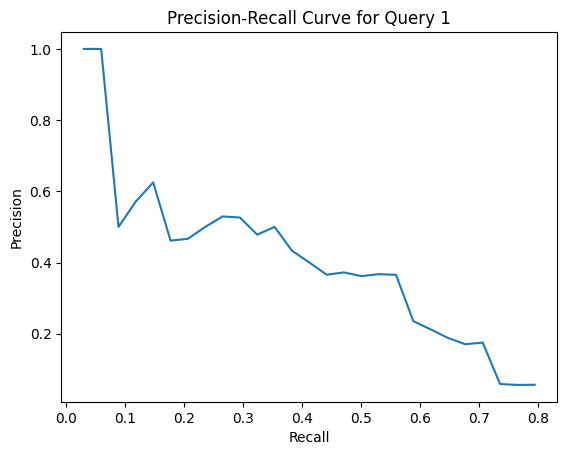

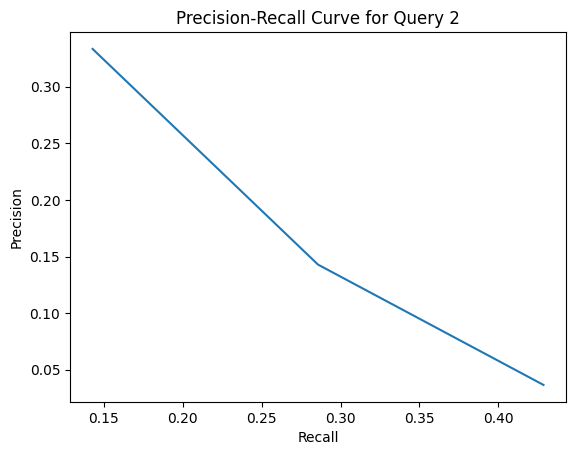

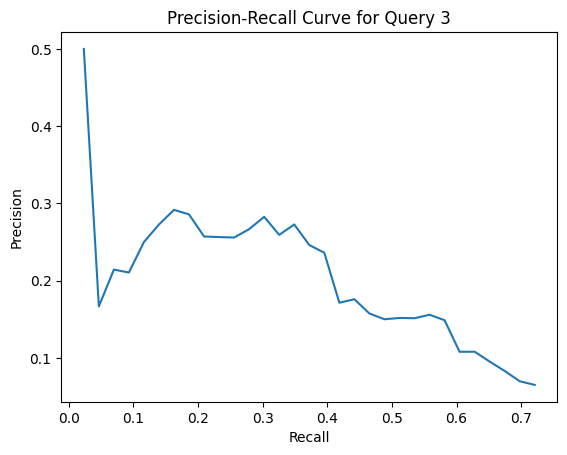

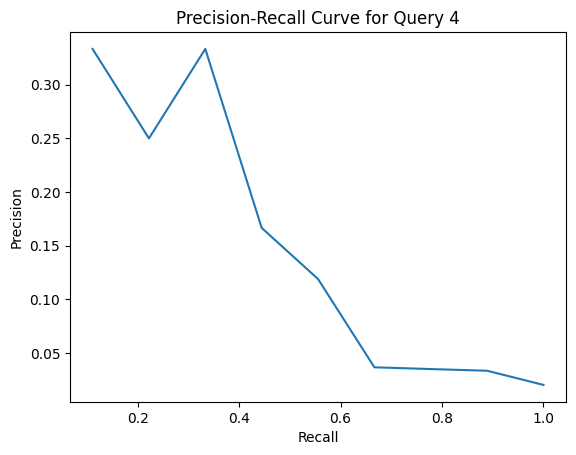

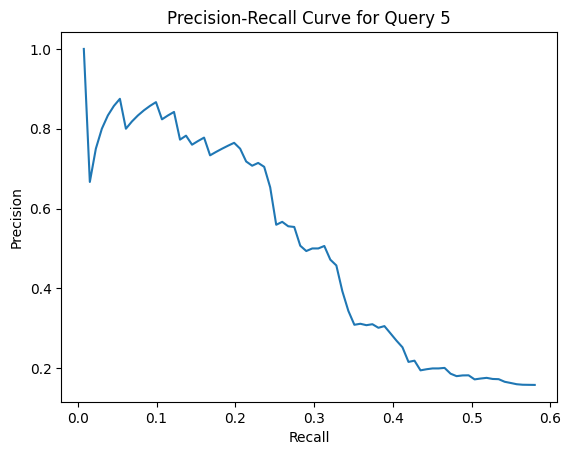

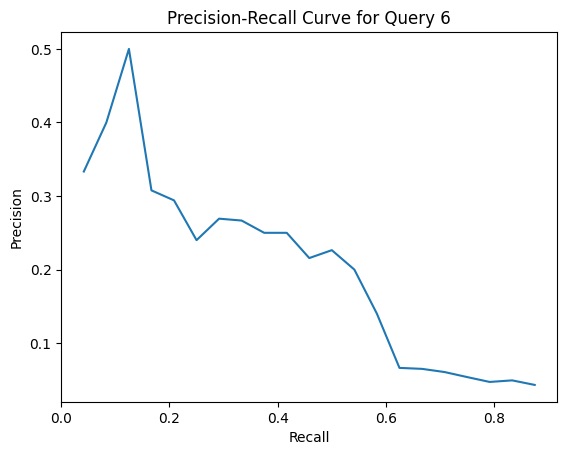

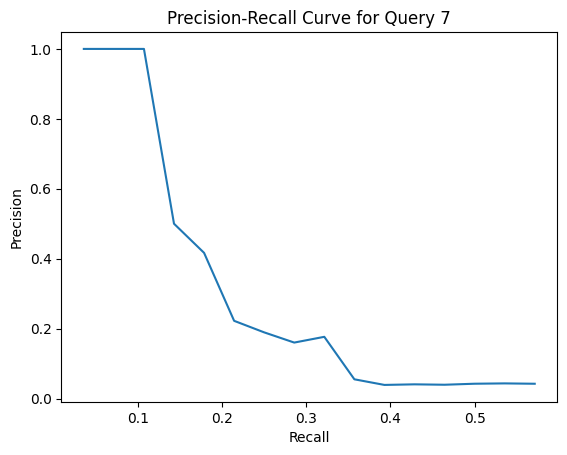

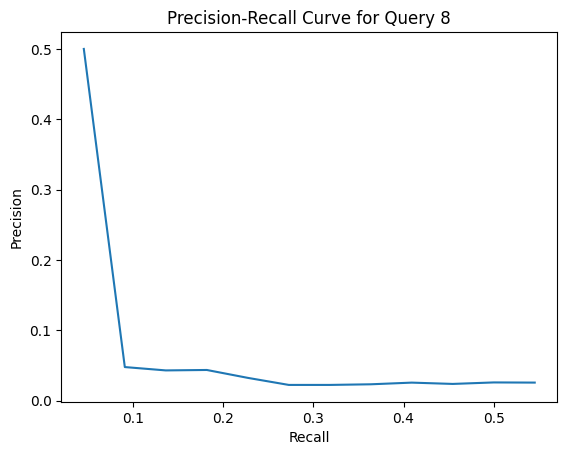

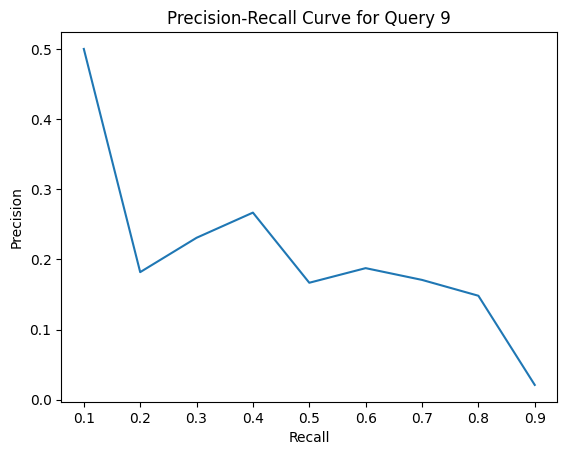

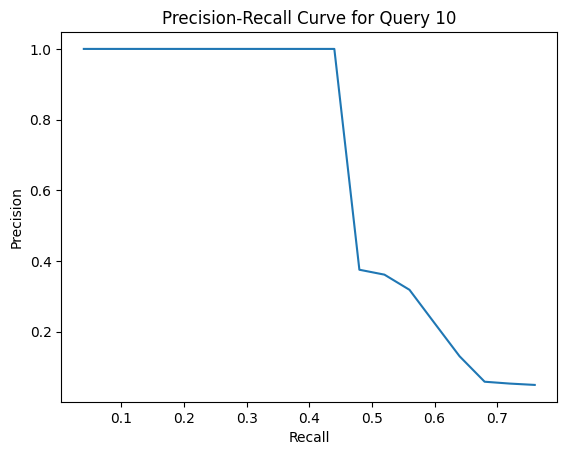

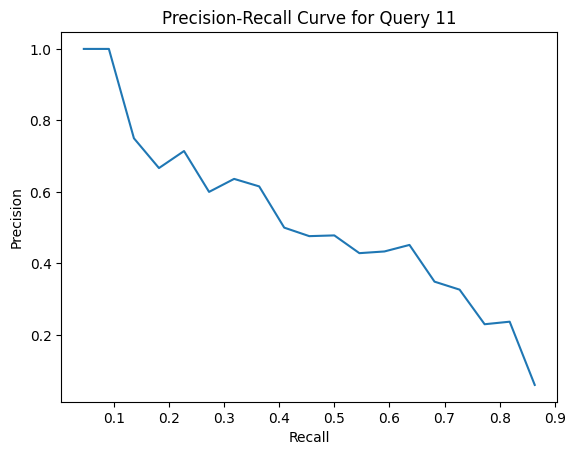

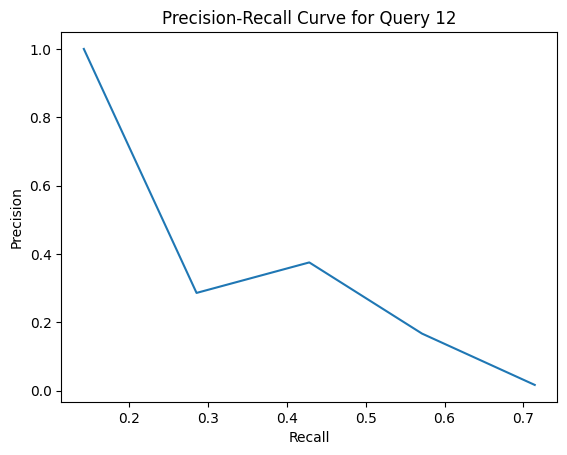

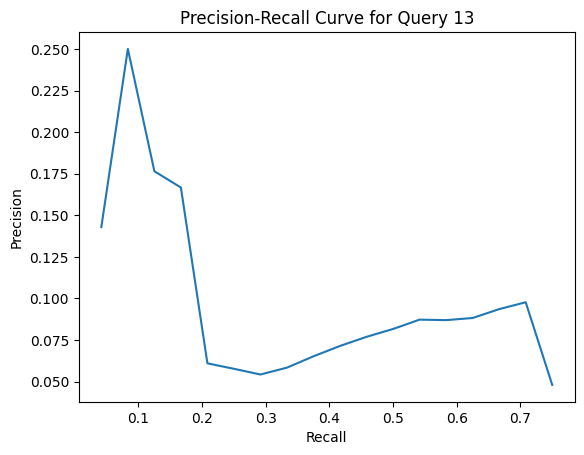

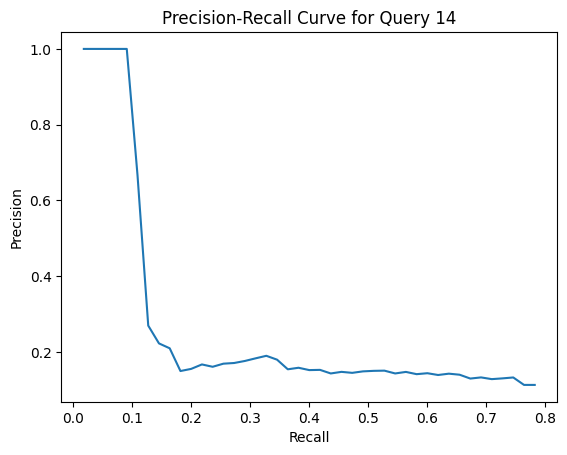

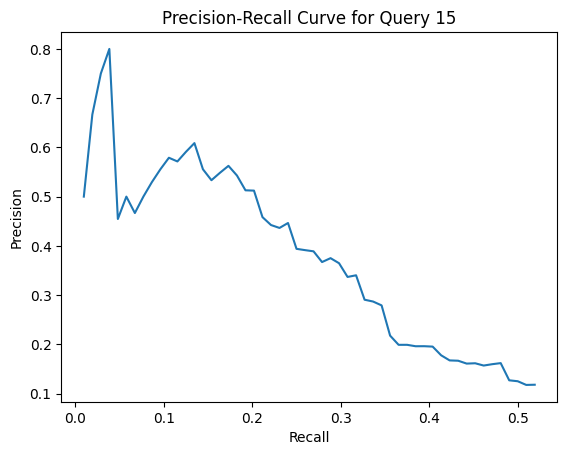

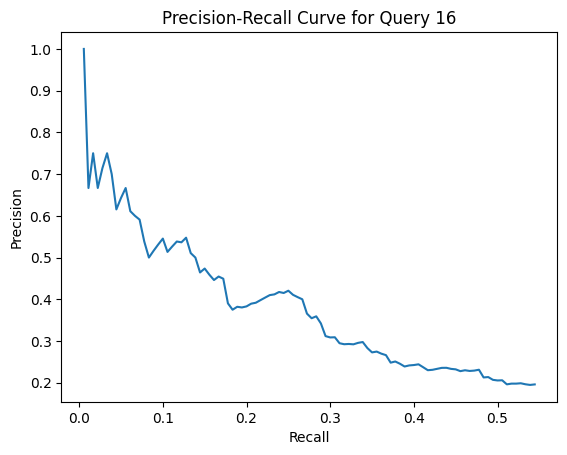

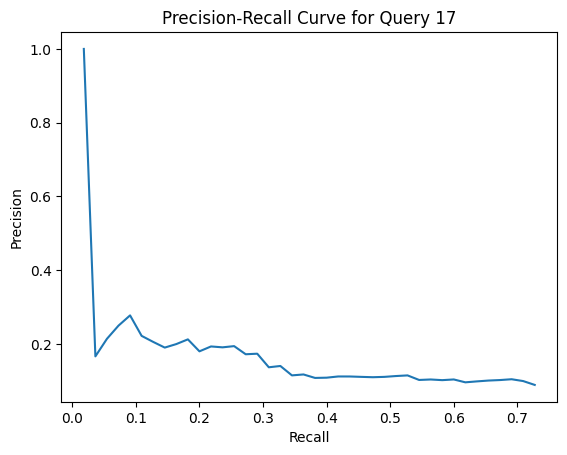

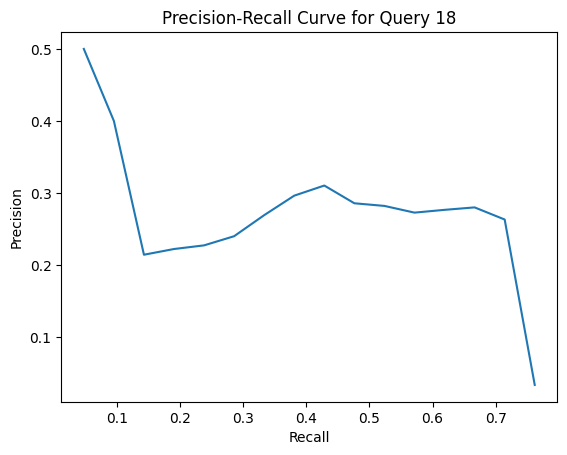

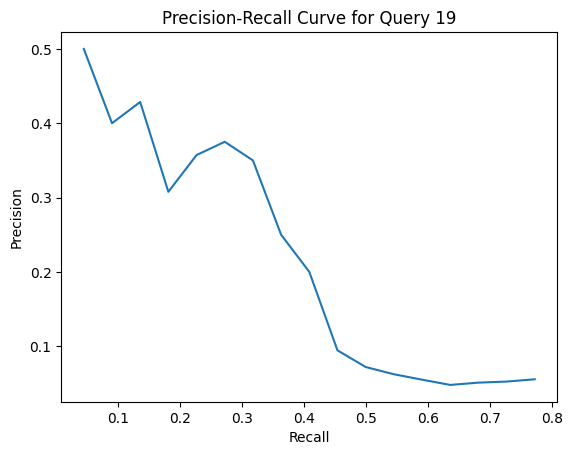

In [9]:
recall_precision_curve(result_docs, relevant)

In [10]:
result_docs[7]

[531,
 439,
 166,
 437,
 100,
 297,
 417,
 265,
 8,
 243,
 534,
 1000,
 341,
 716,
 1030,
 1078,
 635,
 1170,
 1117,
 353,
 224,
 26,
 776,
 384,
 767,
 1191,
 885,
 868,
 504,
 210,
 35,
 32,
 1204,
 930,
 845,
 189,
 887,
 842,
 769,
 447,
 80,
 23,
 1169,
 1039,
 541,
 532,
 233,
 160,
 11,
 452,
 346,
 176,
 571,
 821,
 511,
 330,
 36,
 1037,
 70,
 1234,
 985,
 731,
 148,
 949,
 704,
 999,
 912,
 914,
 374,
 322,
 1067,
 1173,
 614,
 1221,
 1194,
 1155,
 1108,
 1087,
 1070,
 1048,
 1008,
 996,
 974,
 900,
 846,
 834,
 817,
 779,
 773,
 770,
 762,
 503,
 500,
 450,
 381,
 376,
 373,
 361,
 344,
 334,
 305,
 276,
 267,
 258,
 237,
 186,
 162,
 158,
 87,
 72,
 67,
 66,
 57,
 12,
 206,
 1192,
 551,
 31,
 754,
 997,
 796,
 690,
 398,
 289,
 606,
 1197,
 1151,
 1112,
 1082,
 1080,
 1079,
 1073,
 980,
 913,
 910,
 879,
 837,
 820,
 787,
 778,
 768,
 761,
 736,
 733,
 682,
 598,
 590,
 556,
 555,
 550,
 473,
 459,
 457,
 403,
 370,
 333,
 325,
 271,
 212,
 179,
 177,
 159,
 135,
 103,
 99,

In [11]:
(relevant[7])

[23,
 169,
 322,
 370,
 386,
 435,
 439,
 463,
 496,
 497,
 498,
 499,
 503,
 605,
 683,
 710,
 750,
 771,
 867,
 875,
 944,
 1125]